In [17]:
# Author Bereket Kebede, Graduate Student
# Machine Learning -  Homework #3 - University of Memphis. Fall 2022
# Last updated - Oct 27, 2022
# Network (I):  784->150->120->10

# I use keras to build DNN for problem of Question (3) - Assignment 3
import keras

# load MNIST dataset from keras
from keras.datasets import mnist

# split the MNIST dataset into a training and a test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2


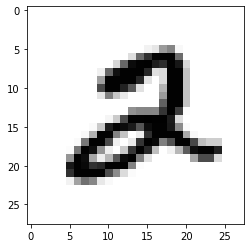

In [18]:
############################################################################

## Display sample images
import matplotlib.pyplot as plt

plt.imshow(x_train[5], cmap=plt.cm.binary)

# View the labels
print(y_train[5])

In [19]:
############################################################################

## Representing data in keras

# print number of dimensions of tensor
print(x_train.ndim)

# print dimension of tensor
print(x_train.shape)

# print data type of tensor
print(x_train.dtype)

3
(60000, 28, 28)
uint8


In [20]:
#############################################################################

## Normalization of data in Keras
# Scale the input values to float32 type

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# Normalize the input values within the interval [0, 1]
x_train /= 255
x_test /= 255


# Reshape the input values
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)


from tensorflow.keras.utils import to_categorical

print(y_test[0])
print(y_train[0])

print(y_train.shape)
print(x_test.shape)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_test[0])
print(y_train[0])

print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
7
5
(60000,)
(10000, 784)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 10)


In [21]:
##############################################################################

## Make the model

from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(150, input_shape=(784,)))  
model.add(Activation('sigmoid'))
model.add(Dense(120))               
model.add(Activation('sigmoid'))
model.add(Dense(10, activation='softmax'))

In [22]:
##############################################################################

## Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 150)               117750    
_________________________________________________________________
activation_6 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               18120     
_________________________________________________________________
activation_7 (Activation)    (None, 120)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1210      
Total params: 137,080
Trainable params: 137,080
Non-trainable params: 0
_________________________________________________________________


In [23]:
##############################################################################

## Implementation of Deep Neural Network in Keras

# Compiling the model 
model.compile(loss="categorical_crossentropy",
optimizer="sgd", metrics = ['accuracy'])

# Training the model 
model.fit(x_train, y_train, batch_size=64, epochs=50)

# Evaluate the model 
test_loss, test_acc = model.evaluate(x_test, y_test)


Epoch 1/50
938/938 [==============================] - 3s 2ms/step - loss: 2.2548 - accuracy: 0.2627
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 2.1061 - accuracy: 0.5239
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 1.8157 - accuracy: 0.6459: 0s - loss: 1.8167 - accuracy: 0.64
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 1.4137 - accuracy: 0.7033
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 1.1003 - accuracy: 0.7471
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.9083 - accuracy: 0.7803
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.7821 - accuracy: 0.8054
Epoch 8/50
938/938 [==============================] - 2s 2ms/step - loss: 0.6908 - accuracy: 0.8254
Epoch 9/50
938/938 [==============================] - 2s 2ms/step - loss: 0.6220 - accuracy: 0.8403
Epoch 10/50
938/938 [==============================] - 2s 2ms/st

In [24]:
###############################################################################

## Printing Accuracy of our model
print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.9271
